In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [183]:
data = pd.read_csv('Sub_Oil_VLCC_Monthly.csv')
data

,Unnamed: 0,542644,548869,93219,534737,36820,542661,10066,542456,24820,...,543880+543332+542784+530997+530785,535034+535038+542800+543348+543896,543924+543376+542828+535086,542832+542696+543380+543928,543932+542700+542836+543384,547724+543360+547728+543908+547720+542812+547716+531033,543888+542792+543340+531025,543372+543368+543920+543916+542692+542688+542824+542820,543364+543912+542684+542816,8852013+8852220+10743960+10778824+10778836+10743901+10778899+10779132
0,19910101,216.0400,404.7017,146.25000,281.3800,155.250,214.4300,268.750,204.9100,312.130,...,33122.130000,45839.530000,52842.860000,48596.370000,49887.600000,60081.570000,39845.120000,52658.090000,31296.190000,13.03000
1,19910201,149.0800,421.4927,115.66667,276.2600,95.750,140.6300,280.000,136.6500,307.280,...,56664.570000,73207.630000,89338.320000,80358.930000,85764.820000,81404.760000,68741.690000,80129.440000,54080.590000,13.15000
2,19910301,119.0500,368.1324,86.33333,190.7900,80.800,107.5100,199.200,106.0300,226.210,...,35121.180000,48163.420000,55941.780000,51293.410000,52934.020000,52744.530000,42298.800000,54990.750000,33230.870000,13.20000
3,19910401,121.9400,387.0115,79.66667,200.2700,77.000,110.7000,191.375,108.9800,235.200,...,19576.480000,30092.690000,31844.400000,30321.090000,29244.860000,36829.640000,23218.850000,36851.860000,18186.700000,13.51000
4,19910501,125.7900,462.6200,82.80000,199.6400,78.600,114.9600,197.200,112.9100,234.610,...,34175.280000,47063.810000,54475.450000,50017.240000,51492.530000,58368.520000,41137.780000,53887.000000,32315.440000,13.05000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,20230901,684.4500,576.0000,568.45000,1024.2000,603.600,711.9000,1054.800,659.7000,1022.900,...,30863.310778,25898.544058,48481.681142,45368.326005,50994.194898,55121.678414,32958.539815,54409.884701,36524.003032,11.51250
393,20231001,660.3750,656.1875,524.37500,970.3125,556.625,700.1250,1014.750,664.6875,973.000,...,42638.283715,50128.701163,63854.584045,65398.069490,70789.307587,65391.097779,45001.265013,72728.810396,49016.415023,11.68875
394,20231101,629.7500,688.1875,489.75000,919.5625,521.875,713.3125,936.125,686.7500,880.875,...,61926.342563,67212.546340,87067.677940,82487.096193,89553.720260,88069.251739,65533.770453,87299.379274,60576.883930,11.88625
395,20231201,588.4500,589.7000,494.65000,868.7500,503.700,681.8500,881.800,615.7000,804.650,...,52011.115747,59195.962123,70954.699113,67922.393093,71746.666697,72573.820342,54569.016270,73118.989011,47718.064695,11.77250


In [184]:
features = ['542236', '67321', '549295', '41108', '541982']

X = data.drop(columns=features)
y = data[features]

In [185]:
X_train = X[:36]
y_train = y[:36]

X_test = X[36:]
y_test = y[36:]

In [186]:
# Data Pre-processing 
# Dimensionality Reduction (PCA)

pca = PCA(n_components=3)  # Choose the number of components you want to keep
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [187]:
mlp_params = {
    #'hidden_layer_sizes': [(50,50), (35, 20, 10), (26, 29)],
    'hidden_layer_sizes': (50, 50, 50),
    'activation': 'relu',
    'solver': 'adam',
    'alpha': 1e-4,
    'max_iter': 25,
    #'verbose': 10,
    'learning_rate_init': .3,
    #'random_state': 2
}

gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,
}

lr_params = {
    #'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]
    'alpha': 0.01,
    'random_state': 42
}

xgb_params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'random_state':42
}





In [188]:
models = [
    ('Linear Regression', LinearRegression()),
    ('MLP', MLPRegressor(**mlp_params)),
    ('Gradient Boosting', GradientBoostingRegressor(**gb_params)),
    #('Lasso', Lasso(alpha=0.1, random_state=42)),
    'Random Forest', RandomForestRegressor(),
    ('XGBoost', XGBRegressor(**xgb_params))
]

bes_model = None
best_accuracy = -float('inf')


Linear Regression Accuracy for Feature 542236: 66.27106492936296

MLP Accuracy for Feature 542236: -0.005432112072633827

Gradient Boosting Accuracy for Feature 542236: 73.3887055796422

Lasso Accuracy for Feature 542236: 66.27106493178033


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:10:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



XGBoost Accuracy for Feature 542236: 73.45803432762226

Linear Regression Accuracy for Feature 67321: 52.546500480245804

MLP Accuracy for Feature 67321: -10979534.975609392

Gradient Boosting Accuracy for Feature 67321: 76.97021717474324

Lasso Accuracy for Feature 67321: 52.546504431930984


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:10:17] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



XGBoost Accuracy for Feature 67321: 76.60003924972368

Linear Regression Accuracy for Feature 549295: 14.712901252945182

MLP Accuracy for Feature 549295: 20.070973635720723

Gradient Boosting Accuracy for Feature 549295: 78.89688113271292

Lasso Accuracy for Feature 549295: 14.712970512102572


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



XGBoost Accuracy for Feature 549295: 78.73666130635685

Linear Regression Accuracy for Feature 41108: -19.636525528890733

MLP Accuracy for Feature 41108: 24.339280152896038

Gradient Boosting Accuracy for Feature 41108: 72.07696965120776

Lasso Accuracy for Feature 41108: -19.63651839539447


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:10:18] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



XGBoost Accuracy for Feature 41108: 70.94900932813195

Linear Regression Accuracy for Feature 541982: -133.39220426343098

MLP Accuracy for Feature 541982: 1.7097253780441104

Gradient Boosting Accuracy for Feature 541982: 59.72978619056178

Lasso Accuracy for Feature 541982: -133.39219725379988


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:10:19] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



XGBoost Accuracy for Feature 541982: 61.38376348032729


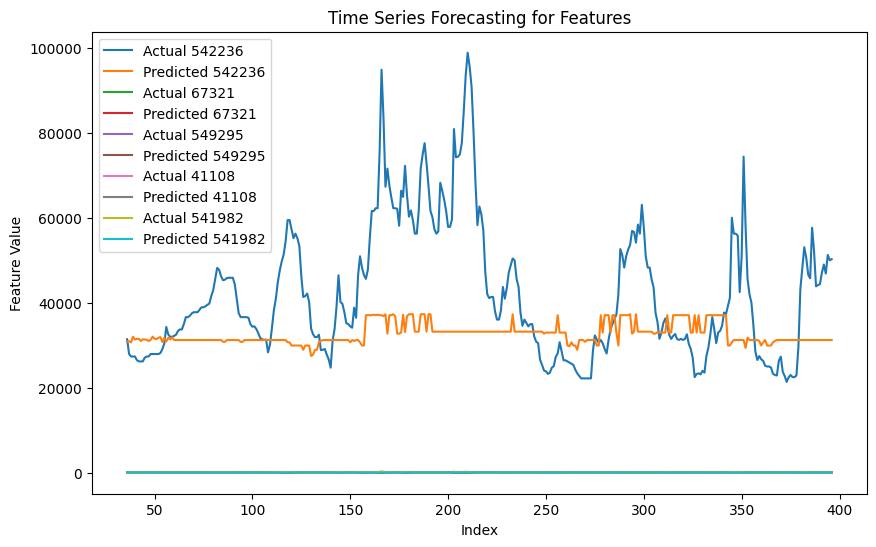

In [189]:
predicted_values = {}
for feature in features:
    #y_train_feature = y_train[[feature]]
    #y_test_feature = y_test[[feature]]
    
    X_train_feature = X_train
    X_test_feature = X_test
    y_train_feature = y_train[feature]
    y_test_feature = y_test[feature]
    
    
    
    for name, model, in models:
        #model.fit(X_train_feature, y_train_feature)
        model.fit(X_train_pca, y_train_feature)
        
        #y_pred = model.predict(X_test_feature)
        y_pred = model.predict(X_test_pca)
        
        accuracy = 100 * (1-abs((y_test_feature - y_pred)/ y_test_feature)).mean()
        print(f'\n{name} Accuracy for Feature {feature}: {accuracy}')
        
        predicted_values[feature] = y_pred
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = (name, feature, model)


plt.figure(figsize=(10, 6))

for feature in features:
    plt.plot(y_test.index, y_test[feature], label=f'Actual {feature}')
    plt.plot(y_test.index, predicted_values[feature], label=f'Predicted {feature}')
    
plt.title('Time Series Forecasting for Features')
plt.xlabel('Index')
plt.ylabel('Feature Value')

plt.legend()

plt.show()